# Step 0.2 -- Introduction to Scientific Python
---

This series of notebooks is based on Python along with the following scientific libraries/packages: 

- SymPy (for symbolic calculations)
- NumPy (for working with arrays)
- Matplotlib (for plotting and visualizing data)
- SciPy (for scientific tools such as special functions, root finding, numerical integration, and numerical solutions to ODE's)

## 1. SymPy

SymPy allows you to perform symbolic calculations and manipulations. The first step is to import it and turn on fancy printing.

In [24]:
# sympy preliminaries
import sympy as sym   #imports sympy
sym.init_printing()   #turns on fancy printing

Next, declare the symbols you want to use.

In [25]:
# examples of symbol declarations
x, y, z = sym.symbols('x, y, z')
alpha, beta, gamma = sym.symbols('alpha, beta, gamma')
a1, a2, a3 = sym.symbols('a1, a2, a3')
x, y, z, alpha, beta, gamma, a1, a2, a3

There are also some specially designated mathematical constants.

In [26]:
# mathematical constants
sym.pi, sym.E, sym.I, sym.oo

Now you can define functions and expressions in terms of the defined symbols. Note that SymPy has its own versions of most mathematical functions, which need to be called using the appropriate namespace prefix (above I defined this as 'sym').

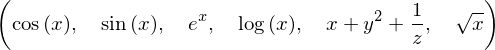

In [27]:
# some elementary functions
f1 = sym.cos(x)
f2 = sym.sin(x)
f3 = sym.exp(x)
f4 = sym.log(x)
f5 = x + y**2 + 1/z
f6 = sym.sqrt(x)
f1, f2, f3, f4, f5, f6

Finally, here are some common operations to get you started using SymPy.

In [28]:
# differentiate
diff1 = sym.diff(f1, x)
diff2 = sym.diff(f1, x, 2)
diff1, diff2

In [29]:
# integrate
int1 = sym.integrate(f4, x)
int2 = sym.integrate(f4, (x, 1, 10))
int1, int2

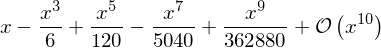

In [30]:
# series expansion around x0, to order n
f2.series(x, x0=0, n=10)

In [31]:
# substitution
f2.subs(x, y*z + 3)

In [32]:
# evaluate to n digits
n = 100
f1.subs(x, sym.pi/4).evalf(n)

In [33]:
# convert a sympy function to a numpy-friendly function using lambdify()
x, A, k = sym.symbols('x, A, k')
symfxn = A*sym.cos(k*x)
npfxn = sym.lambdify((x, A, k), symfxn, 'numpy')
# test the new lambdified function
npfxn(np.pi/3, 2, 2)

### Further reading

For more information about SymPy, see the official SymPy tutorial for beginners

https://docs.sympy.org/latest/tutorial/index.html,

or my SymPy primer

https://github.com/ejwest2/sandbox/blob/master/python/sympy-primer.ipynb.

## 2. NumPy

NumPy allows for efficient vectorized calculations. NumPy has its own vectorized versions of many mathematical functions. This can lead to confusion for the beginner, since there is another Python library called Math which also has many mathematical functions. However, Math only allows for scalar functions. In much of scientific computing, it is faster and more efficient to use vectorized code when ever possible. For that reason we will always use NumPy rather than Math for numerical calculations.

As usual, start by importing the package.

In [34]:
# import package
import numpy as np

You can create arrays in a number of ways. Here are four common examples.

In [35]:
# create an array manually
np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [36]:
# create an array of evenly spaced elements from 0 to 10, with 11 total elements
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [37]:
# create an array of evenly spaced elements from 0 to 10, in increments of 1
np.arange(0.0, 11.0, 1)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [38]:
# create an empty array of zeros
np.zeros(11)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

You can also contruct higher-dimensional arrays in a number of ways. Here are just a couple of examples.

In [39]:
# create a (3x3) array manually
np.array([[1, 2, 3], [4, 5, 6], [6, 7, 8]])

array([[1, 2, 3],
       [4, 5, 6],
       [6, 7, 8]])

In [40]:
# create a higher-dimensional array using one of the many built-in functions, here zeros()
# see also: ones(), diag(), eye(), zeros_like(), ones_like()
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

Once defined, you can use arrays to construct expressions and carry out numerical operations.

In [41]:
# create a sample array
x = np.array([1, 3, 7, 10])
# calculate some elementary functions
f1 = np.cos(x)
f2 = np.sin(x)
f3 = np.exp(x)
f4 = np.log(1+ x)
f5 = np.sqrt(x)
f6 = x + 3*x*x - 4*x**5
f1, f2, f3, f4, f5, f6

(array([ 0.54030231, -0.9899925 ,  0.75390225, -0.83907153]),
 array([ 0.84147098,  0.14112001,  0.6569866 , -0.54402111]),
 array([2.71828183e+00, 2.00855369e+01, 1.09663316e+03, 2.20264658e+04]),
 array([0.69314718, 1.38629436, 2.07944154, 2.39789527]),
 array([1.        , 1.73205081, 2.64575131, 3.16227766]),
 array([      0,    -942,  -67074, -399690]))

It is often important to be able to select elements of an array, either individually, or in entire rows, or columns, or other more complicated chunks. This topic is called "slicing". Here we illustrate a few common ways to "slice" NumPy arrays.

In [42]:
### some ways to slice one-dimensional arrays ### 
# create a 1D array
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# select the first element
b = a[0]
# select the last element
c = a[-1]
# select elements 1 to 5
d = a[1:5]
# select the first four elements
e = a[:4]
# select elements the last four elements
f = a[-4:]
# select every other element
g = a[::2]
a, b, c, d, e, f, g

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 1,
 10,
 array([2, 3, 4, 5]),
 array([1, 2, 3, 4]),
 array([ 7,  8,  9, 10]),
 array([1, 3, 5, 7, 9]))

In [43]:
### some ways to slice two-dimensional arrays ### 
# create a 2D array, in this case a (2x11) array
a = np.array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
              [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])
# select element in the 1st row, 5th column
b = a[0,4]
# select the entire 1st row
c = a[0, :]
# select the entire 3rd column
d = a[:, 2]
# select elements in the 2nd row and first four columns 
e = a[1, :4]
# select elements in the 2nd row and last four columns 
f = a[1, -4:]
# select elements in the 2nd row and columns 3-7 
g = a[1, 2:6]
a, b, c, d, e, f, g

(array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]),
 5,
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 3, 13]),
 array([11, 12, 13, 14]),
 array([17, 18, 19, 20]),
 array([13, 14, 15, 16]))

### Further reading

To learn more about NumPy, see the official NumPy quick start guide

https://docs.scipy.org/doc/numpy/user/quickstart.html,

or my NumPy primer

https://github.com/ejwest2/sandbox/blob/master/python/numpy-primer.ipynb.

## 3. Matplotlib

Matplotlib is the most commonly used graphics package in Python. We will usually use it to plot static 2D graphics, but it can also be used to construct 3D graphics or animations. Those are more advanced topics that we will discuss only if and when we need to. Here we just provide the basics of constructing 2D plots.

As usual, the first step is to load the necessary packages. Here we load both Matplotlib and NumPy.

In [44]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

When working in Jupyter notebook, we also need to tell Matplotlib which graphics backend to use. (NOTE: once you choose a backend, you cannot change it without restarting the notebook kernel.) The 'notebook' backend is the one we will use, as it is fairly standard. But you can experiment with otehrs if you like. To list the available backends and select a backend, use the following line magics. 

In [45]:
# list available backends
%matplotlib --list

# select a graphics backend
%matplotlib notebook

Available matplotlib backends: ['ipympl', 'qt4', 'gtk3', 'osx', 'qt5', 'agg', 'widget', 'notebook', 'inline', 'qt', 'wx', 'nbagg', 'gtk', 'tk']


We're almost ready to plot. First, let's create a grid. Since we will often plot quantities as functions of time, here we create a uniform time grid as follows.

In [46]:
# create a uniform time grid from 0 to 10, with 101 grid points
t = np.linspace(0, 10, 101)

Now we show three common examples of static 2D plots: (1) a single function, (2) multiple functions on the same plot, (3) an array of plots.

<IPython.core.display.Javascript object>


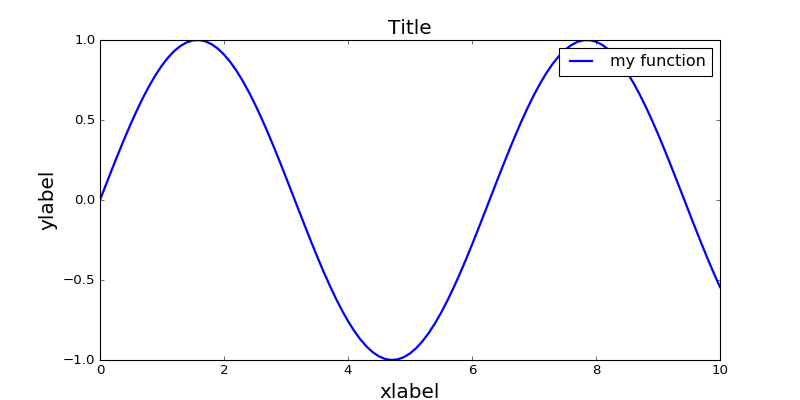

In [47]:
### single function plot ###
# define function
def fxn(t):
    return np.sin(t)
# plot
plt.figure(figsize=(10,5))
plt.plot(t, fxn(t), 'b-', linewidth=2, label='my function')
plt.title('Title', fontsize=18)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


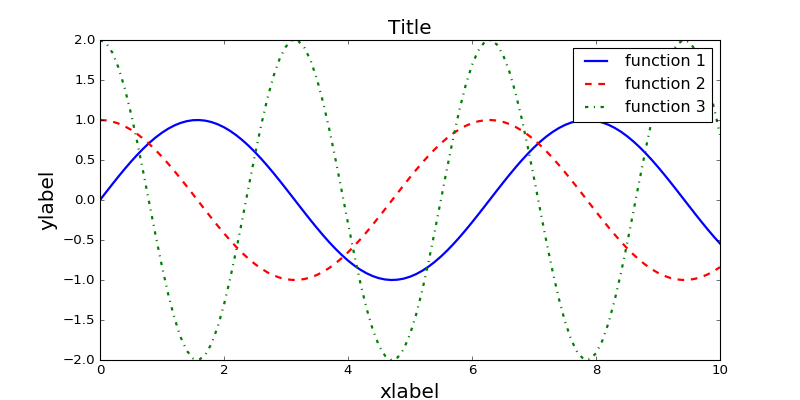

In [48]:
### multiple functions on the same plot ###
# define functions
def fxn1(t):
    return np.sin(t)

def fxn2(t):
    return np.cos(t)

def fxn3(t):
    return 2*np.cos(2*t)

# plot
plt.figure(figsize=(10,5))
plt.plot(t, fxn1(t), 'b-', linewidth=2, label='function 1')
plt.plot(t, fxn2(t), 'r--', linewidth=2, label='function 2')
plt.plot(t, fxn3(t), 'g-.', linewidth=2, label='function 3')
plt.title('Title', fontsize=18)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


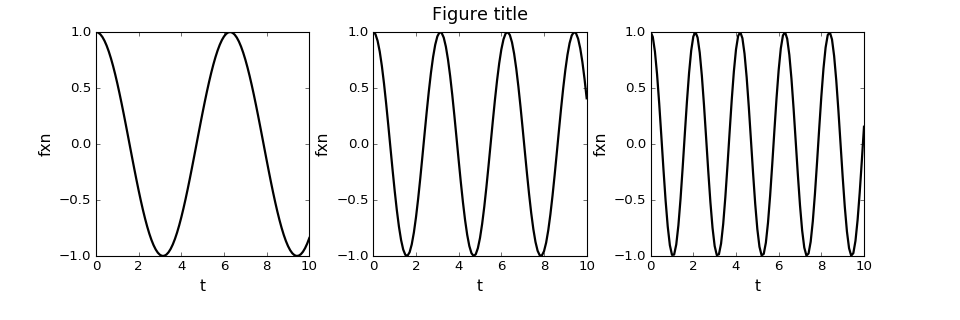

In [49]:
### array of plots ###
# define function
def fxn4(t, omega):
    return np.cos(omega*t)

# array of parameters to use
omega = np.array([1, 2, 3])

# make a figure with multiple subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
fig.suptitle('Figure title', size=16)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, hspace=0.2, wspace=0.3)
# subplot 1
ax1.plot(t, fxn4(t, omega[0]), color='black', linestyle='-', linewidth=2)
ax1.set_xlabel('t',size=14)
ax1.set_ylabel('fxn',size=14)
# subplot 2
ax2.plot(t, fxn4(t, omega[1]), color='black', linestyle='-', linewidth=2)
ax2.set_xlabel('t',size=14)
ax2.set_ylabel('fxn',size=14)
# subplot 3
ax3.plot(t, fxn4(t, omega[2]), color='black', linestyle='-', linewidth=2)
ax3.set_xlabel('t',size=14)
ax3.set_ylabel('fxn',size=14)
# show plots
plt.show()

### Further reading

To learn more about the features and capabilities of Matplotlib, see the official tutorials for beginners

https://matplotlib.org/tutorials/index.html,

or my Matplotlib primer

https://github.com/ejwest2/sandbox/blob/master/python/matplotlib-primer/matplotlib-primer.ipynb.

## 4. SciPy

SciPy implements a number of functions for scientific computing. These are best introduced on an as-needed basis.